In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:93% !important; }</style>"))

In [2]:
# visualizations
import matplotlib.pyplot as plt
import seaborn as sn

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# machine learning processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc, plot_confusion_matrix

from xgboost import XGBClassifier

#basic imports
import pandas as pd
import numpy as np
import os

In [3]:
df = pd.read_csv("machineLearningData (1).csv")
df = df.sample(frac=.05, random_state=42)
df

,Itinerary_ID,Year,Quarter,Number_Coupons,Origin_Airport_ID,Origin_Airport_Seq_ID,Origin_City_Market_ID,Origin,Origin_State,Origin_WAC,...,Origin_Airport,Origin_City,Origin_Lat,Origin_Long,Destination_Airport,Destination_City,State,Country,Destination_Lat,Destination_Long
33238,20201309557,2020,1,4,14843,1484306,34819,SJU,PR,3,...,Luis Muñoz Marín International Airport,San Juan,18.43942,-66.00183,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
31402,2020171849,2020,1,4,13485,1348502,33485,MSN,WI,45,...,Dane County Regional Airport,Madison,43.13986,-89.33751,LaGuardia Airport (Marine Air Terminal),New York,NY,USA,40.77724,-73.87261
54983,20201411032,2020,1,2,11298,1129806,30194,DFW,TX,74,...,Dallas/Fort Worth International Airport,Dallas-Fort Worth,32.89595,-97.03720,Indianapolis International Airport,Indianapolis,IN,USA,39.71733,-86.29438
10574,20201249202,2020,1,2,11193,1119302,33105,CVG,KY,52,...,Cincinnati/Northern Kentucky International Air...,Covington,39.04614,-84.66217,Phoenix Sky Harbor International Airport,Phoenix,AZ,USA,33.43417,-112.00806
37150,20201549218,2020,1,2,14100,1410005,34100,PHL,PA,23,...,Philadelphia International Airport,Philadelphia,39.87195,-75.24114,Fort Lauderdale-Hollywood International Airport,Ft. Lauderdale,FL,USA,26.07258,-80.15275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55720,20201127106,2020,1,4,11057,1105703,31057,CLT,NC,36,...,Charlotte Douglas International Airport,Charlotte,35.21401,-80.94313,Southwest Florida International Airport,Ft. Myers,FL,USA,26.53617,-81.75517
56936,20201312936,2020,1,3,13891,1389101,32575,ONT,CA,91,...,Ontario International Airport,Ontario,34.05600,-117.60119,San Diego International Airport (Lindbergh Field),San Diego,CA,USA,32.73356,-117.18966
3647,20201307988,2020,1,2,13303,1330303,32467,MIA,FL,33,...,Miami International Airport,Miami,25.79325,-80.29056,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720
57611,20201362449,2020,1,2,11057,1105703,31057,CLT,NC,36,...,Charlotte Douglas International Airport,Charlotte,35.21401,-80.94313,Albert J. Ellis Airport,Jacksonville,NC,USA,34.82916,-77.61214


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3267 entries, 33238 to 15593
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Itinerary_ID           3267 non-null   int64  
 1   Year                   3267 non-null   int64  
 2   Quarter                3267 non-null   int64  
 3   Number_Coupons         3267 non-null   int64  
 4   Origin_Airport_ID      3267 non-null   int64  
 5   Origin_Airport_Seq_ID  3267 non-null   int64  
 6   Origin_City_Market_ID  3267 non-null   int64  
 7   Origin                 3267 non-null   object 
 8   Origin_State           3267 non-null   object 
 9   Origin_WAC             3267 non-null   int64  
 10  Dest_Airport_ID        3267 non-null   int64  
 11  Dest_Airport_Seq_ID    3267 non-null   int64  
 12  Dest_City_Market_ID    3267 non-null   int64  
 13  Destination            3267 non-null   object 
 14  Dest_State             3267 non-null   object 
 15 

In [5]:
df.describe()

,Itinerary_ID,Year,Quarter,Number_Coupons,Origin_Airport_ID,Origin_Airport_Seq_ID,Origin_City_Market_ID,Origin_WAC,Dest_Airport_ID,Dest_Airport_Seq_ID,Dest_City_Market_ID,Dest_WAC,Flight_Distance,Fare,Number_Passengers,Origin_Lat,Origin_Long,Destination_Lat,Destination_Long
count,3.267000e+03,3267.0,3267.0,3267.000000,3267.000000,3.267000e+03,3267.000000,3267.000000,3267.000000,3.267000e+03,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3265.000000,3265.000000
mean,1.611827e+10,2020.0,1.0,3.006428,12177.364555,1.217741e+06,31435.257729,50.254668,12321.891338,1.232193e+06,31523.608815,50.997857,835.335170,458.083257,1.642792,35.550352,-90.113271,35.621042,-90.543977
std,7.644518e+09,0.0,0.0,1.160809,1376.174002,1.376170e+05,1187.491554,23.804921,1445.172896,1.445170e+05,1260.800146,24.012926,633.911745,349.080103,5.476503,5.105206,14.921552,5.124741,15.053095
min,2.020180e+05,2020.0,1.0,1.000000,10135.000000,1.013506e+06,30135.000000,1.000000,10140.000000,1.014005e+06,30140.000000,1.000000,11.000000,0.000000,1.000000,17.701890,-157.922410,17.701890,-159.338960
25%,2.020112e+10,2020.0,1.0,2.000000,11057.000000,1.105703e+06,30431.000000,34.000000,11057.000000,1.105703e+06,30466.000000,34.000000,373.000000,252.500000,1.000000,32.895950,-97.037200,32.895950,-97.037200
50%,2.020127e+10,2020.0,1.0,3.000000,11433.000000,1.143302e+06,31057.000000,41.000000,11697.000000,1.169706e+06,31057.000000,41.000000,644.000000,398.000000,1.000000,35.214010,-84.426940,35.214010,-84.662170
75%,2.020142e+10,2020.0,1.0,4.000000,13303.000000,1.330303e+06,32211.000000,74.000000,13487.000000,1.348702e+06,32457.000000,74.000000,1096.000000,574.000000,1.000000,39.858410,-80.290560,39.871950,-80.943130
max,2.020161e+10,2020.0,1.0,8.000000,16218.000000,1.621802e+06,35412.000000,93.000000,16218.000000,1.621802e+06,35412.000000,93.000000,4243.000000,4203.000000,216.000000,61.174320,-64.798560,61.174320,-64.798560


In [6]:
len(df)

3267

In [7]:
#df = pd.get_dummies(df, columns=["Origin", "Destination"])

In [8]:
corrs = df.corr()
corrs

,Itinerary_ID,Year,Quarter,Number_Coupons,Origin_Airport_ID,Origin_Airport_Seq_ID,Origin_City_Market_ID,Origin_WAC,Dest_Airport_ID,Dest_Airport_Seq_ID,Dest_City_Market_ID,Dest_WAC,Flight_Distance,Fare,Number_Passengers,Origin_Lat,Origin_Long,Destination_Lat,Destination_Long
Itinerary_ID,1.000000,NaN,NaN,-0.058713,0.026708,0.026708,-0.062774,0.228079,0.082831,0.082831,-0.008146,0.215539,0.199673,-0.021797,0.046341,-0.237929,-0.216727,-0.225186,-0.199128
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quarter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_Coupons,-0.058713,NaN,NaN,1.000000,0.020066,0.020067,0.019021,0.032074,-0.078809,-0.078809,-0.037477,0.011963,-0.110634,0.238150,-0.118218,0.000987,-0.051510,-0.012298,-0.020021
Origin_Airport_ID,0.026708,NaN,NaN,0.020066,1.000000,1.000000,0.650358,0.134023,-0.063181,-0.063180,-0.078608,0.032157,0.111828,0.046040,-0.015004,-0.020837,-0.223250,0.043132,-0.063436
Origin_Airport_Seq_ID,0.026708,NaN,NaN,0.020067,1.000000,1.000000,0.650357,0.134026,-0.063180,-0.063179,-0.078607,0.032158,0.111829,0.046041,-0.015003,-0.020838,-0.223253,0.043132,-0.063437
Origin_City_Market_ID,-0.062774,NaN,NaN,0.019021,0.650358,0.650357,1.000000,-0.104572,-0.080906,-0.080905,-0.145763,-0.077203,0.082851,0.007507,-0.001909,-0.024407,-0.027384,-0.013830,0.063658
Origin_WAC,0.228079,NaN,NaN,0.032074,0.134023,0.134026,-0.104572,1.000000,0.049224,0.049225,-0.026725,0.278698,0.109905,0.040751,-0.001160,-0.103383,-0.749830,-0.059187,-0.315655
Dest_Airport_ID,0.082831,NaN,NaN,-0.078809,-0.063181,-0.063180,-0.080906,0.049224,1.000000,1.000000,0.644389,0.145370,0.137068,0.012058,-0.003972,-0.009940,-0.072536,-0.019542,-0.239980
Dest_Airport_Seq_ID,0.082831,NaN,NaN,-0.078809,-0.063180,-0.063179,-0.080905,0.049225,1.000000,1.000000,0.644388,0.145372,0.137069,0.012058,-0.003972,-0.009940,-0.072538,-0.019543,-0.239982


In [9]:
df = df.dropna(how="any")
df

,Itinerary_ID,Year,Quarter,Number_Coupons,Origin_Airport_ID,Origin_Airport_Seq_ID,Origin_City_Market_ID,Origin,Origin_State,Origin_WAC,...,Origin_Airport,Origin_City,Origin_Lat,Origin_Long,Destination_Airport,Destination_City,State,Country,Destination_Lat,Destination_Long
33238,20201309557,2020,1,4,14843,1484306,34819,SJU,PR,3,...,Luis Muñoz Marín International Airport,San Juan,18.43942,-66.00183,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
31402,2020171849,2020,1,4,13485,1348502,33485,MSN,WI,45,...,Dane County Regional Airport,Madison,43.13986,-89.33751,LaGuardia Airport (Marine Air Terminal),New York,NY,USA,40.77724,-73.87261
54983,20201411032,2020,1,2,11298,1129806,30194,DFW,TX,74,...,Dallas/Fort Worth International Airport,Dallas-Fort Worth,32.89595,-97.03720,Indianapolis International Airport,Indianapolis,IN,USA,39.71733,-86.29438
10574,20201249202,2020,1,2,11193,1119302,33105,CVG,KY,52,...,Cincinnati/Northern Kentucky International Air...,Covington,39.04614,-84.66217,Phoenix Sky Harbor International Airport,Phoenix,AZ,USA,33.43417,-112.00806
37150,20201549218,2020,1,2,14100,1410005,34100,PHL,PA,23,...,Philadelphia International Airport,Philadelphia,39.87195,-75.24114,Fort Lauderdale-Hollywood International Airport,Ft. Lauderdale,FL,USA,26.07258,-80.15275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55720,20201127106,2020,1,4,11057,1105703,31057,CLT,NC,36,...,Charlotte Douglas International Airport,Charlotte,35.21401,-80.94313,Southwest Florida International Airport,Ft. Myers,FL,USA,26.53617,-81.75517
56936,20201312936,2020,1,3,13891,1389101,32575,ONT,CA,91,...,Ontario International Airport,Ontario,34.05600,-117.60119,San Diego International Airport (Lindbergh Field),San Diego,CA,USA,32.73356,-117.18966
3647,20201307988,2020,1,2,13303,1330303,32467,MIA,FL,33,...,Miami International Airport,Miami,25.79325,-80.29056,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720
57611,20201362449,2020,1,2,11057,1105703,31057,CLT,NC,36,...,Charlotte Douglas International Airport,Charlotte,35.21401,-80.94313,Albert J. Ellis Airport,Jacksonville,NC,USA,34.82916,-77.61214


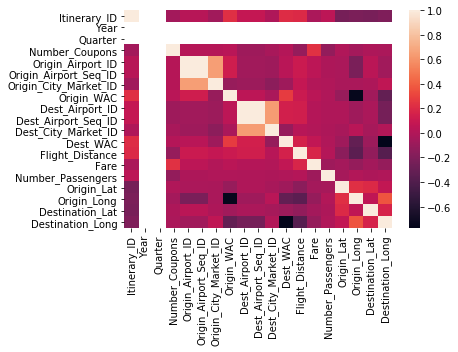

In [10]:
sn.heatmap(corrs)

In [11]:
abs(corrs["Fare"]).sort_values(ascending=False)

Fare                     1.000000
Number_Coupons           0.238150
Flight_Distance          0.178160
Origin_Long              0.113036
Destination_Long         0.108190
Number_Passengers        0.078969
Dest_WAC                 0.070221
Destination_Lat          0.057475
Origin_Lat               0.048352
Origin_Airport_Seq_ID    0.046041
Origin_Airport_ID        0.046040
Origin_WAC               0.040751
Itinerary_ID             0.021797
Dest_Airport_Seq_ID      0.012058
Dest_Airport_ID          0.012058
Origin_City_Market_ID    0.007507
Dest_City_Market_ID      0.006176
Year                          NaN
Quarter                       NaN
Name: Fare, dtype: float64

In [12]:
features = list(corrs["Fare"].loc[abs(corrs["Fare"]) > .056].index)
features = features[0:len(features)]
features.pop(2)
features.pop(2)
#features.pop(0)
features

['Number_Coupons',
 'Dest_WAC',
 'Number_Passengers',
 'Origin_Long',
 'Destination_Lat',
 'Destination_Long']

In [13]:
target_col = "Fare"

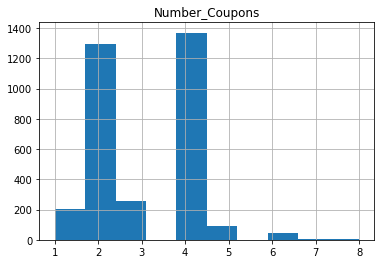

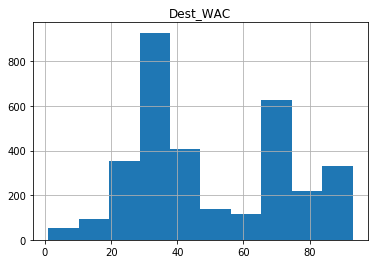

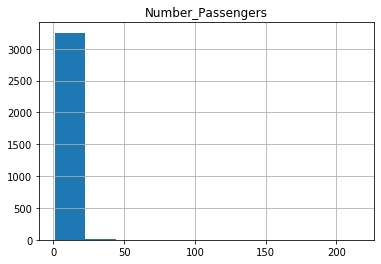

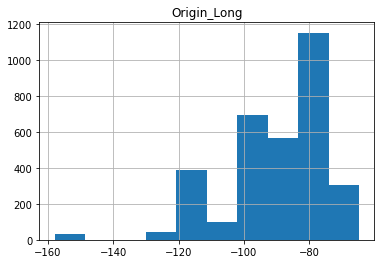

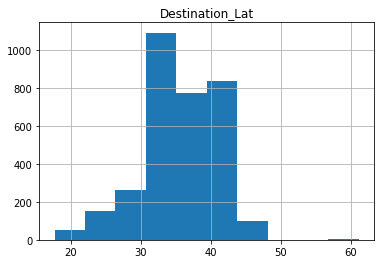

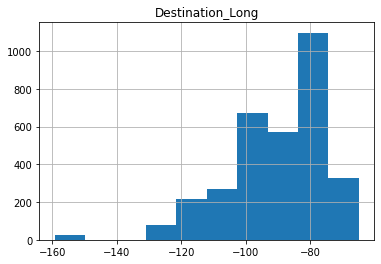

In [14]:
for col in features:
    df[[col]].hist()

In [15]:
#split the data
X = df[features]
y = df[target_col].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [16]:
print(X.shape, y.shape)

(3265, 6) (3265, 1)


In [17]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)

In [18]:
print(len(X_train))
print(len(X_test))

2612
653


In [19]:
 # Create the model using LinearRegression

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [20]:
lm.fit(X_train, y_train)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
predictions_train_lm = lm.predict(X_train)
predictions_test_lm = lm.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
mse_train_lm = mean_squared_error(y_train, predictions_train_lm)
r2_train_lm = r2_score(y_train, predictions_train_lm)

print("Linear Regression Train")
print("-----------------------")
print("MSE:")
print(mse_train_lm)
print("r2:")
print(r2_train_lm)

Linear Regression Train
-----------------------
MSE:
113664.3577538041
r2:
0.07803696439484153


In [24]:
mse_test_lm = mean_squared_error(y_test, predictions_test_lm)
r2_test_lm = r2_score(y_test, predictions_test_lm)

print(mse_test_lm)
print(r2_test_lm)

108352.21240158756
0.068417196508604


In [25]:
import random

In [26]:
random.seed(42)

mse_train_lm_list = []
r2_train_lm_list = []

mse_test_lm_list = []
r2_test_lm_list = []

for i in range(10):
    random_state = random.randint(0, 5000)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, train_size=0.8)

    lm = LinearRegression()
    lm.fit(X_train, y_train)

    predictions_train_lm = lm.predict(X_train)
    predictions_test_lm = lm.predict(X_test)
    
    mse_train_lm = mean_squared_error(y_train, predictions_train_lm)
    r2_train_lm = r2_score(y_train, predictions_train_lm)
    mse_test_lm = mean_squared_error(y_test, predictions_test_lm)
    r2_test_lm = r2_score(y_test, predictions_test_lm)

    mse_train_lm_list.append(mse_train_lm)
    r2_train_lm_list.append(r2_train_lm)
    mse_test_lm_list.append(mse_test_lm)
    r2_test_lm_list.append(r2_test_lm)

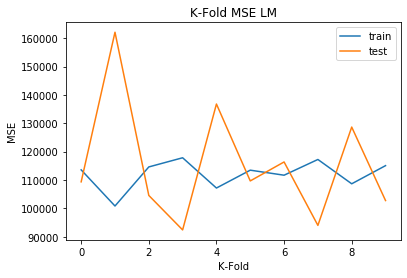

In [27]:
plt.plot(range(10), mse_train_lm_list, label="train")
plt.plot(range(10), mse_test_lm_list, label="test")
plt.title("K-Fold MSE LM")
plt.xlabel("K-Fold")
plt.ylabel("MSE")
plt.legend()
plt.show()

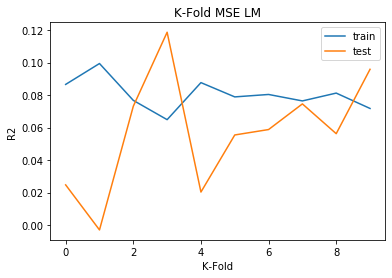

In [28]:
plt.plot(range(10), r2_train_lm_list, label="train")
plt.plot(range(10), r2_test_lm_list, label="test")
plt.title("K-Fold MSE LM")
plt.xlabel("K-Fold")
plt.ylabel("R2")
plt.legend()
plt.show()

In [29]:
print("Linear Regression")
print("-----------------------")
print("MSE Train:")
print(np.mean(mse_train_lm_list))
print("r2 Train:")
print(np.mean(r2_train_lm))
print("MSE Test:")
print(np.mean(mse_test_lm))
print("r2 Test:")
print(np.mean(r2_test_lm))

Linear Regression
-----------------------
MSE Train:
112009.63162896418
r2 Train:
0.07172439105245365
MSE Test:
102752.89674016458
r2 Test:
0.09581856094553676


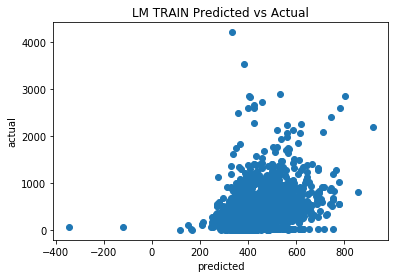

In [30]:
plt.scatter(predictions_train_lm, y_train)
plt.title("LM TRAIN Predicted vs Actual")
plt.xlabel("predicted")
plt.ylabel("actual")

plt.show()

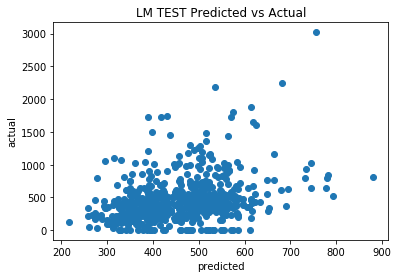

In [31]:
plt.scatter(predictions_test_lm, y_test)
plt.title("LM TEST Predicted vs Actual")
plt.xlabel("predicted")
plt.ylabel("actual")

plt.show()

In [32]:
resid_train_lm = predictions_train_lm - y_train
resid_test_lm = predictions_test_lm - y_test

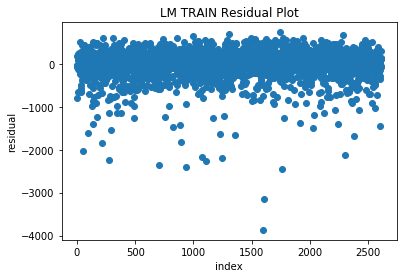

In [33]:
plt.scatter(range(len(resid_train_lm)), resid_train_lm)
plt.title("LM TRAIN Residual Plot")
plt.xlabel("index")
plt.ylabel("residual")

plt.show()

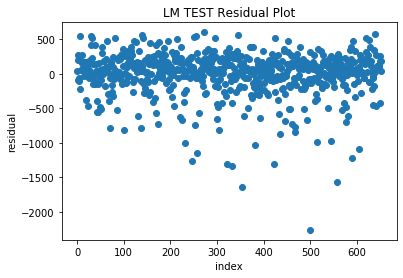

In [34]:
plt.scatter(range(len(resid_test_lm)), resid_test_lm)
plt.title("LM TEST Residual Plot")
plt.xlabel("index")
plt.ylabel("residual")

plt.show()

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
rf.fit(X_train, y_train)
rf

C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
predictions_train_rf = rf.predict(X_train)
predictions_test_rf = rf.predict(X_test)

In [38]:
mse_train_rf = mean_squared_error(y_train, predictions_train_rf)
r2_train_rf = r2_score(y_train, predictions_train_rf)

print(mse_train_rf)
print(r2_train_rf)

39882.20748008623
0.6782307987341769


In [39]:
mse_test_rf = mean_squared_error(y_test, predictions_test_rf)
r2_test_rf = r2_score(y_test, predictions_test_rf)

print(mse_test_rf)
print(r2_test_rf)

143838.43843576868
-0.2657165917675115


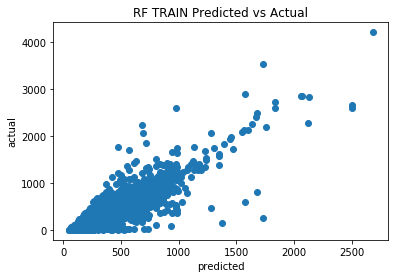

In [40]:
plt.scatter(predictions_train_rf, y_train)
plt.title("RF TRAIN Predicted vs Actual")
plt.xlabel("predicted")
plt.ylabel("actual")

plt.show()

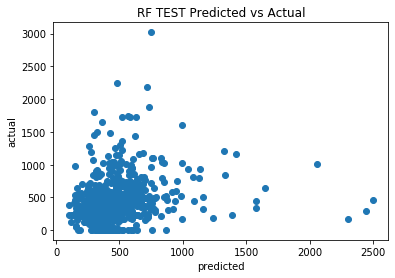

In [41]:
plt.scatter(predictions_test_rf, y_test)
plt.title("RF TEST Predicted vs Actual")
plt.xlabel("predicted")
plt.ylabel("actual")

plt.show()

In [42]:
resid_train_rf = predictions_train_rf - [x[0] for x in y_train]
resid_test_rf = predictions_test_rf - [x[0] for x in y_test]

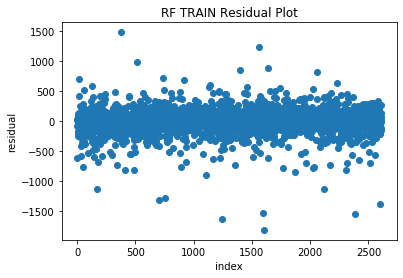

In [43]:
plt.scatter(range(len(resid_train_rf)), resid_train_rf)
plt.title("RF TRAIN Residual Plot")
plt.xlabel("index")
plt.ylabel("residual")

plt.show()

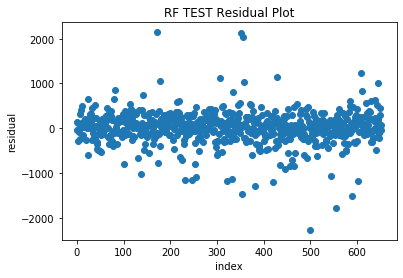

In [44]:
plt.scatter(range(len(resid_test_rf)), resid_test_rf)
plt.title("RF TEST Residual Plot")
plt.xlabel("index")
plt.ylabel("residual")

plt.show()

In [45]:
random.seed(42)

mse_train_rf_list = []
r2_train_rf_list = []

mse_test_rf_list = []
r2_test_rf_list = []

for i in range(10):
    random_state = random.randint(0, 5000)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, train_size=0.8)

    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    predictions_train_rf = rf.predict(X_train)
    predictions_test_rf = rf.predict(X_test)
    
    mse_train_rf = mean_squared_error(y_train, predictions_train_rf)
    r2_train_rf = r2_score(y_train, predictions_train_rf)
    mse_test_rf = mean_squared_error(y_test, predictions_test_rf)
    r2_test_rf = r2_score(y_test, predictions_test_rf)

    mse_train_rf_list.append(mse_train_rf)
    r2_train_rf_list.append(r2_train_rf)
    mse_test_rf_list.append(mse_test_rf)
    r2_test_rf_list.append(r2_test_rf)

C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A col

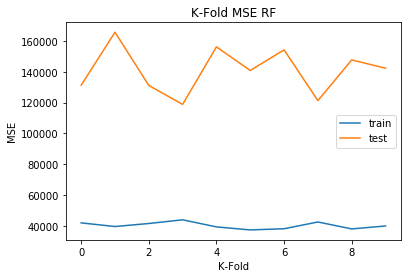

In [46]:
plt.plot(range(10), mse_train_rf_list, label="train")
plt.plot(range(10), mse_test_rf_list, label="test")
plt.title("K-Fold MSE RF")
plt.xlabel("K-Fold")
plt.ylabel("MSE")
plt.legend()
plt.show()

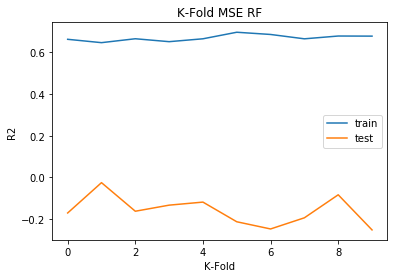

In [47]:
plt.plot(range(10), r2_train_rf_list, label="train")
plt.plot(range(10), r2_test_rf_list, label="test")
plt.title("K-Fold MSE RF")
plt.xlabel("K-Fold")
plt.ylabel("R2")
plt.legend()
plt.show()

In [48]:
print("Random Forest Regressor")
print("-----------------------")
print("MSE Train:")
print(np.mean(mse_train_rf_list))
print("r2 Train:")
print(np.mean(r2_train_rf))
print("MSE Test:")
print(np.mean(mse_test_rf))
print("r2 Test:")
print(np.mean(r2_test_rf))

Random Forest Regressor
-----------------------
MSE Train:
40156.567105169415
r2 Train:
0.6785128979890842
MSE Test:
142295.37677709246
r2 Test:
-0.2521383107131119


In [49]:
rf_prod = RandomForestRegressor()
rf_prod.fit(X, y)

C:\Users\Maxi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [50]:
predictions_prod_rf = rf_prod.predict(X)
mse_prod_rf = mean_squared_error(y, predictions_prod_rf)
r2_prod_rf = r2_score(y, predictions_prod_rf)

print("Random Forest Regressor")
print("-----------------------")
print("MSE Production:")
print(mse_prod_rf)
print("r2 Production:")
print(r2_prod_rf)

Random Forest Regressor
-----------------------
MSE Production:
43909.60136088101
r2 Production:
0.639767663253733


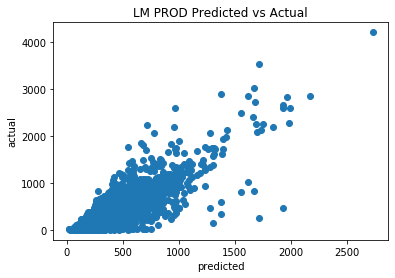

In [51]:
plt.scatter(predictions_prod_rf, y)
plt.title("LM PROD Predicted vs Actual")
plt.xlabel("predicted")
plt.ylabel("actual")

plt.show()

In [52]:
import pickle

In [53]:
# save the model to disk
filename = 'ml_rf_fp.sav'
pickle.dump(rf_prod, open(filename, 'wb'))

In [54]:
my_prod_model = pickle.load(open('ml_rf_fp.sav', 'rb'))

In [55]:
#Inputs
origin_airport = "SEA"
destination_airport = "MIA"

In [56]:
#Get Latitude and Longitude
or_lat = -df.loc[df.Origin==origin_airport,'Origin_Lat'].values[0]
or_long = df.loc[df.Origin==origin_airport,'Origin_Long'].values[0]
de_lat = -df.loc[df.Origin==destination_airport,'Origin_Lat'].values[0]
de_long = df.loc[df.Origin==destination_airport,'Origin_Long'].values[0]

print(or_lat, or_long)
print(de_lat, de_long)

-47.44898 -122.30931
-25.79325 -80.29056


In [57]:
#Distance Calculator
def haversine_distance(or_lat, or_long, de_lat, de_long):
   r = 6371
   phi1 = np.radians(or_lat)
   phi2 = np.radians(de_lat)
   delta_phi = np.radians(de_lat - or_lat)
   delta_lambda = np.radians(de_long - or_long)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [58]:
#Convert to miles
km = haversine_distance(or_lat, or_long, de_lat, de_long)
mi = km * 0.62137
mi

2721.2774876

In [59]:
#Observations
number_coupons = 1
miles = mi
origin_lat = or_lat
origin_long = or_long
destination_lat = de_lat
destination_long = de_long

In [60]:
new_obs = [[number_coupons, miles, origin_lat, origin_long, destination_lat, destination_long]]

In [61]:
fare = my_prod_model.predict(new_obs)

In [62]:
print(list(map('${:.2f}'.format,fare)))

['$1004.47']
